## Outliers detection using LOF, SVM, kNN, DBSCAN algorithms

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

# Load the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Selecting relevant numerical features
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
housing_features = housing_data[features]

# Normalizing the data
scaler = StandardScaler()
housing_features_scaled = scaler.fit_transform(housing_features)

housing_features_scaled_df = pd.DataFrame(housing_features_scaled, columns=features)

# Applying Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
housing_features_scaled_df['LOF'] = lof.fit_predict(housing_features_scaled_df[features])

# Applying One-Class SVM
svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
housing_features_scaled_df['SVM'] = svm.fit_predict(housing_features_scaled_df[features])

# Applying k-Nearest Neighbors (kNN)
n_neighbors = 20
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(housing_features_scaled_df[features])
distances, indices = knn.kneighbors(housing_features_scaled_df[features])
average_distances = distances.mean(axis=1)
outlier_threshold = average_distances.mean() + 3 * average_distances.std()
housing_features_scaled_df['kNN'] = (average_distances > outlier_threshold).astype(int)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
housing_features_scaled_df['DBSCAN'] = dbscan.fit_predict(housing_features_scaled_df[features])

# Identifying outliers
lof_outliers = housing_features_scaled_df[housing_features_scaled_df['LOF'] == -1]
svm_outliers = housing_features_scaled_df[housing_features_scaled_df['SVM'] == -1]
knn_outliers = housing_features_scaled_df[housing_features_scaled_df['kNN'] == 1]
dbscan_outliers = housing_features_scaled_df[housing_features_scaled_df['DBSCAN'] == -1]

lof_outliers_count = lof_outliers.shape[0]
svm_outliers_count = svm_outliers.shape[0]
knn_outliers_count = knn_outliers.shape[0]
dbscan_outliers_count = dbscan_outliers.shape[0]

print(f"LOF outliers: {lof_outliers_count}")
print(f"SVM outliers: {svm_outliers_count}")
print(f"kNN outliers: {knn_outliers_count}")
print(f"DBSCAN outliers: {dbscan_outliers_count}")

lof_outliers.head()
svm_outliers.head()
knn_outliers.head()
dbscan_outliers.head()


LOF outliers: 1081
SVM outliers: 1079
kNN outliers: 273
DBSCAN outliers: 1373


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,LOF,SVM,kNN,DBSCAN
5,1.865642,0.676503,3.097133,3.636791,2.096185,-0.915427,2.537955,2.798440,1.021181,-0.210128,4.046611,3.265566,-1,-1,1,-1
21,3.976678,-0.398669,0.824835,1.056271,0.718502,-0.915427,0.654061,0.968199,-0.102310,-0.210128,3.098225,0.277163,1,-1,0,-1
49,2.206132,-0.398669,0.500221,0.732890,1.204698,-0.915427,0.454803,0.669938,-0.612988,-0.210128,1.011778,2.188160,-1,1,0,-1
70,1.361717,1.751675,1.474063,2.929053,0.844698,-0.915427,1.547703,3.182564,0.067916,-0.210128,2.251974,0.957698,1,1,0,-1
95,0.993989,0.676503,0.500221,1.328478,-0.117263,-0.915427,0.726518,1.397515,-0.851304,4.746678,-0.053332,-0.246248,1,1,0,-1


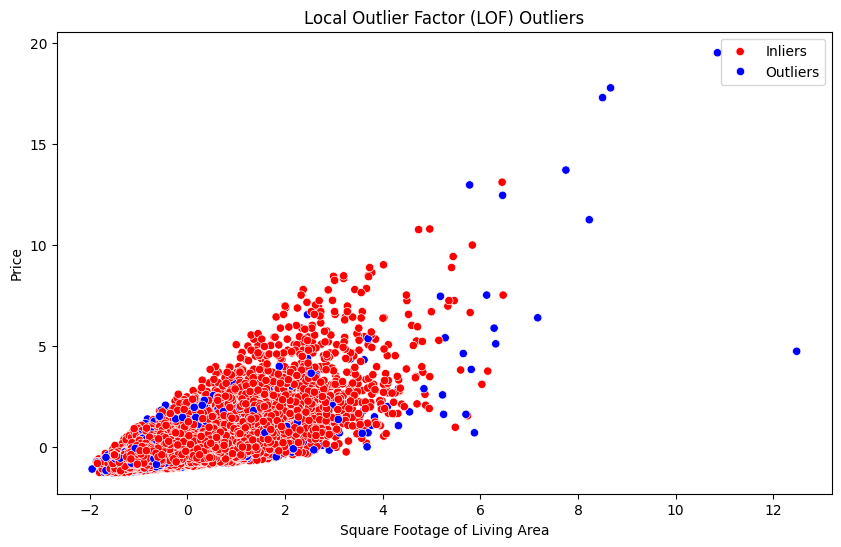

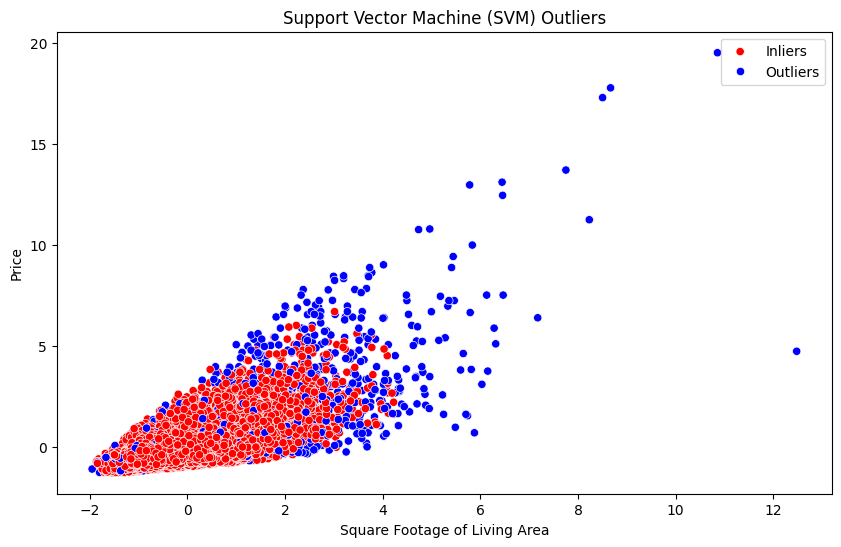

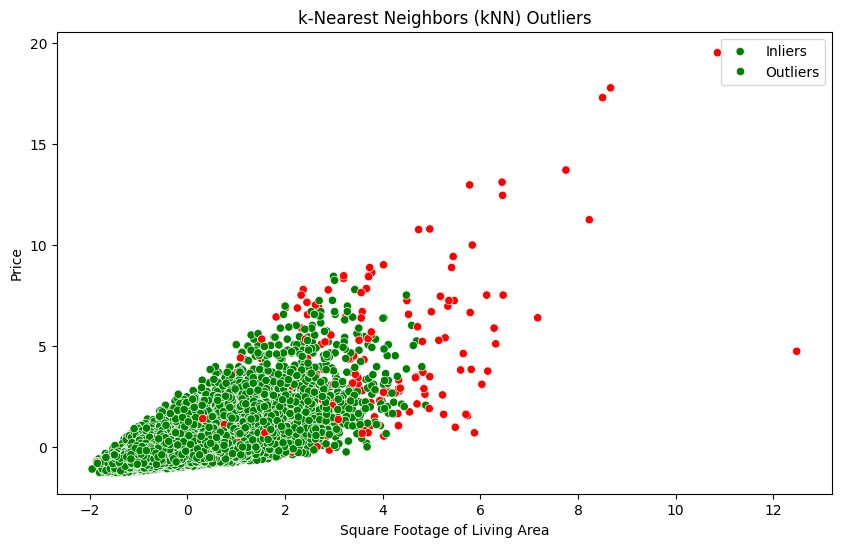

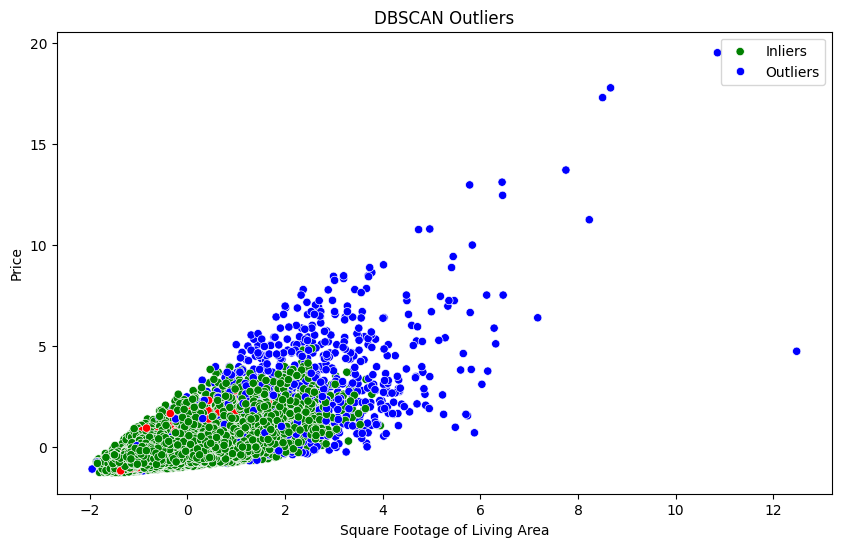

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plots for visualization
def visualize_outliers(df, outlier_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sqft_living', y='price', data=df, hue=outlier_column, palette={1: 'red', -1: 'blue', 0: 'green', 2: 'orange', 3: 'purple'})
    plt.title(title)
    plt.xlabel('Square Footage of Living Area')
    plt.ylabel('Price')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()

# Visualize LOF outliers
visualize_outliers(housing_features_scaled_df, 'LOF', 'Local Outlier Factor (LOF) Outliers')

# Visualize SVM outliers
visualize_outliers(housing_features_scaled_df, 'SVM', 'Support Vector Machine (SVM) Outliers')

# Visualize kNN outliers
visualize_outliers(housing_features_scaled_df, 'kNN', 'k-Nearest Neighbors (kNN) Outliers')

# Visualize DBSCAN outliers
visualize_outliers(housing_features_scaled_df, 'DBSCAN', 'DBSCAN Outliers')


## Denoising Autoencoder

Epoch 1/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1438 - val_loss: 0.7165
Epoch 2/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7742 - val_loss: 0.5884
Epoch 3/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6628 - val_loss: 0.5544
Epoch 4/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6809 - val_loss: 0.5323
Epoch 5/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6486 - val_loss: 0.5182
Epoch 6/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6658 - val_loss: 0.5112
Epoch 7/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6044 - val_loss: 0.5070
Epoch 8/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5936 - val_loss: 0.5044
Epoch 9/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6054 - val_loss: 0.5029
Epoch 10/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6283 - val_loss: 0.5021
Epoch 11/100
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6264 - val_loss: 0.5014
Epoch 12/100
608/608 ━━━━━━━━━━━━━━━━━━━━

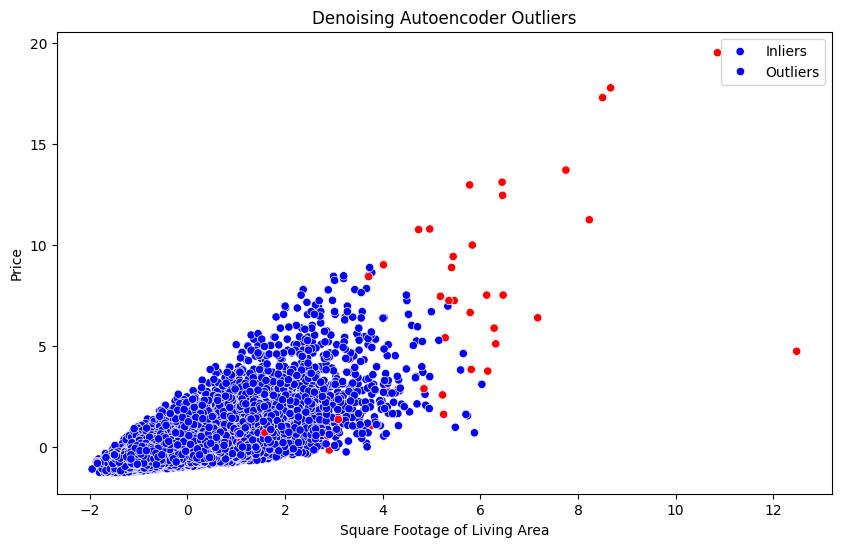

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Selecting relevant numerical features
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
housing_features = housing_data[features]

# Normalizing the data
scaler = StandardScaler()
housing_features_scaled = scaler.fit_transform(housing_features)

housing_features_scaled_df = pd.DataFrame(housing_features_scaled, columns=features)

# Adding noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy_data, 0., 1.)

noisy_housing_features_scaled = add_noise(housing_features_scaled)

# Define the Denoising Autoencoder model
input_dim = housing_features_scaled.shape[1]
encoding_dim = 10  # Dimension of the encoding layer

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = layers.Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Train the Autoencoder
autoencoder.fit(
    noisy_housing_features_scaled, housing_features_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# Predict the reconstruction error
reconstructions = autoencoder.predict(housing_features_scaled)
mse = tf.keras.losses.MeanSquaredError()
reconstruction_error = np.mean(np.square(housing_features_scaled - reconstructions), axis=1)

# Identify outliers based on the reconstruction error
threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
housing_features_scaled_df['Autoencoder'] = (reconstruction_error > threshold).astype(int)

# Identifying outliers
autoencoder_outliers = housing_features_scaled_df[housing_features_scaled_df['Autoencoder'] == 1]
autoencoder_outliers_count = autoencoder_outliers.shape[0]

print(f"Autoencoder outliers: {autoencoder_outliers_count}")
autoencoder_outliers.head()

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plots for visualization
def visualize_outliers(df, outlier_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sqft_living', y='price', data=df, hue=outlier_column, palette={1: 'red', 0: 'blue'})
    plt.title(title)
    plt.xlabel('Square Footage of Living Area')
    plt.ylabel('Price')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()

# Visualize Autoencoder outliers
visualize_outliers(housing_features_scaled_df, 'Autoencoder', 'Denoising Autoencoder Outliers')


## Bayesian Network

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import numpy as np
from pgmpy.metrics import log_likelihood_score

# Load the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

# Selecting relevant numerical features
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
housing_features = housing_data[features]

# Normalize the data
scaler = StandardScaler()
housing_features_scaled = scaler.fit_transform(housing_features)

housing_features_scaled_df = pd.DataFrame(housing_features_scaled, columns=features)

# Creating a Bayesian Network structure manually or using a suitable method
model = BayesianNetwork([
    ('price', 'sqft_living'),
    ('price', 'bedrooms'),
    ('price', 'bathrooms'),
    ('bedrooms', 'bathrooms'),
    ('sqft_living', 'sqft_above'),
    ('sqft_living', 'sqft_basement'),
    ('sqft_above', 'floors'),
    ('sqft_basement', 'yr_built'),
    ('yr_built', 'yr_renovated'),
    ('sqft_living15', 'sqft_lot15'),
    ('sqft_living', 'sqft_lot'),
])

# Fit the model using Maximum Likelihood Estimation
model.fit(housing_features_scaled_df, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)

# print(set(model.nodes()) == set(housing_features_scaled_df.columns))
# print(set(housing_features_scaled_df.columns) - set(model.nodes()))

# Calculate log-likelihoods for the dataset
log_likelihoods = []
# print(log_likelihoods)

for i in range(len(housing_features_scaled_df)):
    # evidence = housing_features_scaled_df.iloc[i].to_dict()
#     evidence = housing_features_scaled_df.iloc[i]
    log_likelihood = log_likelihood_score(model, pd.DataFrame([housing_features_scaled_df.iloc[i]]))
    # log_likelihood = model.score([evidence])
    log_likelihoods.append(log_likelihood)

# Convert log-likelihoods to numpy array
log_likelihoods = np.array(log_likelihoods)

# Identify outliers based on log-likelihoods
threshold = np.mean(log_likelihoods) - 3 * np.std(log_likelihoods)
housing_features_scaled_df['BayesianNetwork'] = (log_likelihoods < threshold).astype(int)

# Identifying outliers
bayesian_network_outliers = housing_features_scaled_df[housing_features_scaled_df['BayesianNetwork'] == 1]
bayesian_network_outliers_count = bayesian_network_outliers.shape[0]

print(f"Bayesian Network outliers: {bayesian_network_outliers_count}")
bayesian_network_outliers.head()

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plots for visualization
def visualize_outliers(df, outlier_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sqft_living', y='price', data=df, hue=outlier_column, palette={1: 'red', 0: 'blue'})
    plt.title(title)
    plt.xlabel('Square Footage of Living Area')
    plt.ylabel('Price')
    plt.legend(['Inliers', 'Outliers'])
    plt.show()

# Visualize Bayesian Network outliers
visualize_outliers(housing_features_scaled_df, 'BayesianNetwork', 'Bayesian Network Outliers')
